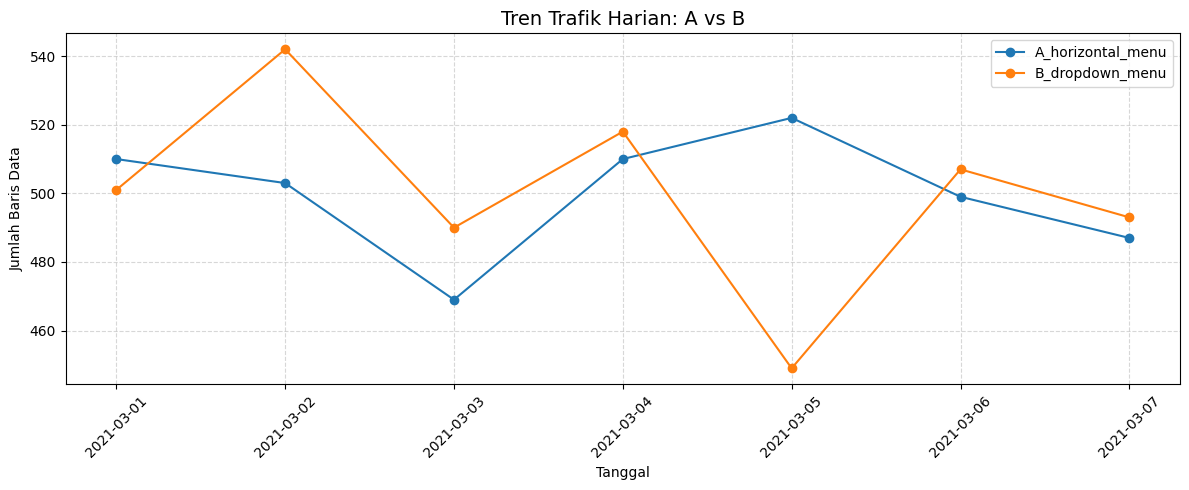

Contoh data harian yang berhasil dihitung:
variant     A_horizontal_menu  B_dropdown_menu
date                                          
2021-03-01                510              501
2021-03-02                503              542
2021-03-03                469              490
2021-03-04                510              518
2021-03-05                522              449


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
path = r'D:\@02 Personal\@03 Mini Data Project\@07 DEC Portfolio\data\test1_menu.xlsx'
df = pd.read_excel(path)

# 2. Ubah format tanggal (Sesuaikan format dengan DD/MM/YYYY di gambar Anda)
# dayfirst=True sangat penting karena data Anda menggunakan format Indonesia/Eropa (07/03)
df['timestamp'] = pd.to_datetime(df['timestamp'], dayfirst=True)
df['date'] = df['timestamp'].dt.date

# 3. Hitung jumlah baris mentah per hari (tanpa membuang sesi duplikat)
# Kita ingin melihat apakah distribusi barisnya stabil
daily_counts = df.groupby(['date', 'variant']).size().unstack(fill_value=0)

# 4. Plotting
plt.figure(figsize=(12, 5))
for variant in daily_counts.columns:
    plt.plot(daily_counts.index, daily_counts[variant], marker='o', label=variant)

plt.title('Tren Trafik Harian: A vs B', fontsize=14)
plt.ylabel('Jumlah Baris Data')
plt.xlabel('Tanggal')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cek apakah datanya memang ada
print("Contoh data harian yang berhasil dihitung:")
print(daily_counts.head())